#### [Source Insee](https://www.insee.fr/fr/statistiques/2540004)
> _Fichier de données nationales qui contient les prénoms attribués aux enfants nés en France hors Mayotte entre 1900 et 2018 et les effectifs par sexe associés à chaque prénom ;_

In [86]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [87]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [144]:
df = pd.read_csv('dpt2018.csv', sep=';')

In [191]:
#df.head()

In [146]:
df.columns = ['sexe', 'prenom', 'year', 'dpt', 'nombre']

In [186]:
df['sexe'] = df['sexe'].replace([1,2], ['H','F'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
df = df[~df.year.str.startswith('X')]

In [189]:
df.year = pd.to_numeric(df.year)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [149]:
# année min
#df.annais.min()

In [150]:
# année max renseignée
#df[~df.annais.str.startswith('X')].annais.max()

In [151]:
# df.head()

In [152]:
out = widgets.Text(
    value='Entrez un prénom en MAJUSCULE',
    placeholder='Type something',
    description='',
    disabled=False
)
out

Text(value='Entrez un prénom en MAJUSCULE', placeholder='Type something')

In [222]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Cliquez pour voir le graph !")
button.on_click(run_all)
display(button)

Button(description='Cliquez pour voir le graph !', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [239]:
name = out.value

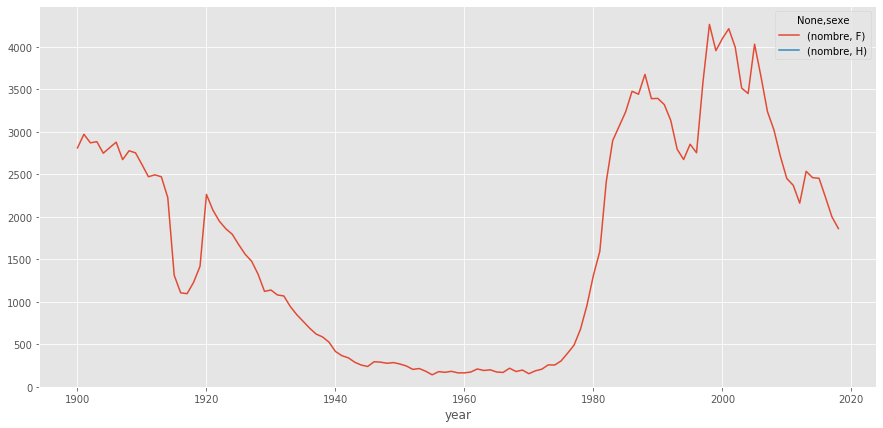

In [240]:
df[df.prenom == name].groupby(['year', 'sexe'])[['nombre']].sum().unstack(1).plot(figsize=(15,7), ylim=0)